In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

TensorFlow 2.x selected.


In [0]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
maxlen = 200

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [0]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 11s 470us/sample - loss: 0.5492 - accuracy: 0.6991 - val_loss: 0.3504 - val_accuracy: 0.8520
Epoch 2/20
22500/22500 [==============================] - 2s 105us/sample - loss: 0.2719 - accuracy: 0.8912 - val_loss: 0.3617 - val_accuracy: 0.8420
Epoch 3/20
22500/22500 [==============================] - 2s 105us/sample - loss: 0.2002 - accuracy: 0.9255 - val_loss: 0.3019 - val_accuracy: 0.8848
Epoch 4/20
22500/22500 [==============================] - 2s 106us/sample - loss: 0.1603 - accuracy: 0.9428 - val_loss: 0.3285 - val_accuracy: 0.8736
Epoch 5/20
22500/22500 [==============================] - 2s 109us/sample - loss: 0.1321 - accuracy: 0.9545 - val_loss: 0.3419 - val_accuracy: 0.8720
Epoch 6/20
22500/22500 [==============================] - 2s 103us/sample - loss: 0.1099 - accuracy: 0.9636 - val_loss: 0.3974 - val_accuracy: 0.8692
Epoch 7/20
22500/22500 [==========================

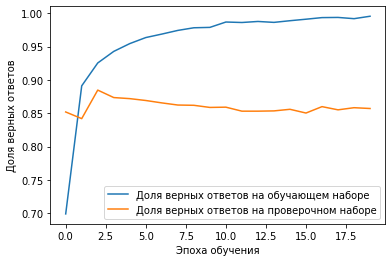

In [9]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [10]:
scores = model.evaluate(x_test, y_test, verbose=1)

25000/25000 [==============================] - 4s 170us/sample - loss: 0.9388 - accuracy: 0.8316
